In [27]:
from sklearn.utils import shuffle
import numpy as np

data_file = "emotion.txt"
data = np.loadtxt(data_file)
data = shuffle(data)

In [28]:
print(data)

[[0.015038 0.032594 0.05418  ... 0.04075  0.037303 2.      ]
 [0.022698 0.04719  0.076538 ... 0.046037 0.045346 0.      ]
 [0.036191 0.074836 0.116354 ... 0.059822 0.055149 3.      ]
 ...
 [0.018191 0.043523 0.077872 ... 0.049896 0.050681 1.      ]
 [0.020513 0.046997 0.081664 ... 0.048043 0.044213 2.      ]
 [0.029756 0.063728 0.102789 ... 0.049372 0.047539 0.      ]]


In [29]:
X = data[:, :-1]
y = data[:, -1]   

In [30]:
X.shape, y.shape

((75091, 4851), (75091,))

In [31]:
y[:50]

array([2., 0., 3., 2., 2., 0., 2., 1., 1., 3., 1., 1., 3., 3., 1., 1., 0.,
       1., 1., 3., 3., 3., 0., 0., 3., 3., 1., 0., 1., 2., 2., 1., 1., 0.,
       1., 3., 1., 1., 2., 3., 1., 2., 3., 0., 1., 3., 1., 0., 2., 1.])

In [32]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_samples = X_train_scaled.shape[0]
n_features = X_train_scaled.shape[1]


pca = PCA(n_components=min(n_samples, n_features))
# pca = PCA(n_components= 4000)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [33]:
num_input = X_train_pca.shape[1]
num_input

4851

In [34]:
X_train_pca.shape

(60072, 4851)

In [35]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=4)
y_test_categorical = to_categorical(y_test, num_classes=4)

from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_input,), 
                 kernel_regularizer=regularizers.l2(0.001)),  
    layers.Dropout(0.2), 
    layers.Dense(128, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.001)),  
    layers.Dropout(0.2), 
    layers.Dense(64, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.001)),  
    layers.Dropout(0.2), 
    layers.Dense(4, activation='softmax')  
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0000001)

model.fit(X_train_pca, y_train_categorical, epochs=1000, batch_size=128, 
          validation_data=(X_test_pca, y_test_categorical), 
          callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test_pca, y_test_categorical)
print(f"Độ chính xác trên dữ liệu kiểm tra: {accuracy * 100:.2f}%")

/home/orlab/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4842 - loss: 1.5631 - val_accuracy: 0.6823 - val_loss: 1.0115 - learning_rate: 1.0000e-04
Epoch 2/1000
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6664 - loss: 1.0485 - val_accuracy: 0.7228 - val_loss: 0.9076 - learning_rate: 1.0000e-04
Epoch 3/1000
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7076 - loss: 0.9413 - val_accuracy: 0.7364 - val_loss: 0.8625 - learning_rate: 1.0000e-04
Epoch 4/1000
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7234 - loss: 0.8908 - val_accuracy: 0.7435 - val_loss: 0.8321 - learning_rate: 1.0000e-04
Epoch 5/1000
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7340 - loss: 0.8621 - val_accuracy: 0.7500 - val_loss: 0.8098 - learning_rate: 1.0000e-04
Epoch 6/1000
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7478 - loss: 0.8242 - val_accuracy: 0.7525 - val_loss: 0.7890 - learning_rate: 1.0000e-04
Epoch 7/1000
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/ste

470/470 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step


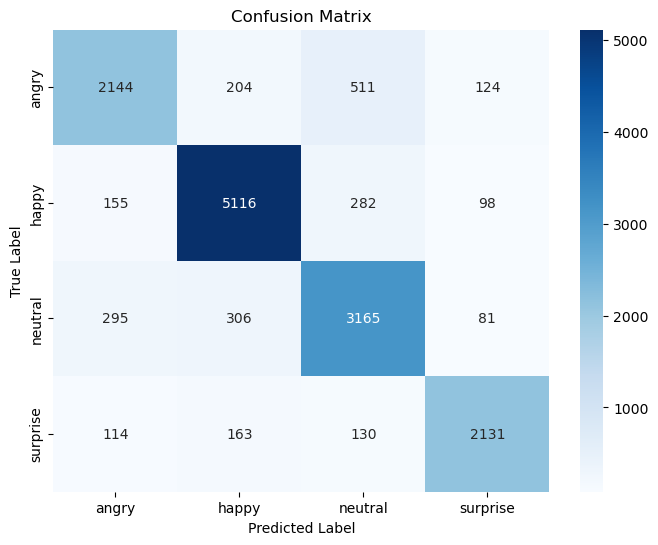

Classification Report:

              precision    recall  f1-score   support

       angry       0.79      0.72      0.75      2983
       happy       0.88      0.91      0.89      5651
     neutral       0.77      0.82      0.80      3847
    surprise       0.88      0.84      0.86      2538

    accuracy                           0.84     15019
   macro avg       0.83      0.82      0.83     15019
weighted avg       0.84      0.84      0.84     15019



In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, class_names):

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  

    y_true = np.argmax(y_test, axis=1)

    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:\n")
    print(classification_report(y_true, y_pred_classes, target_names=class_names))

class_names = ['angry','happy', 'neutral','surprise']
evaluate_model(model, X_test_pca, y_test_categorical, class_names)

470/470 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step


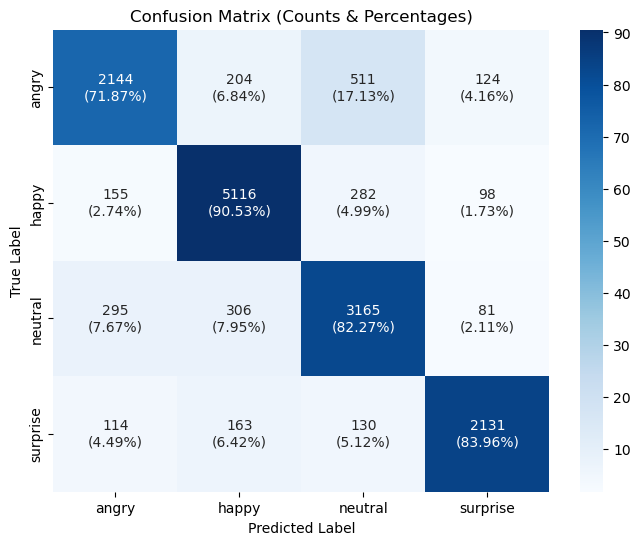

Classification Report:

              precision    recall  f1-score   support

       angry       0.79      0.72      0.75      2983
       happy       0.88      0.91      0.89      5651
     neutral       0.77      0.82      0.80      3847
    surprise       0.88      0.84      0.86      2538

    accuracy                           0.84     15019
   macro avg       0.83      0.82      0.83     15019
weighted avg       0.84      0.84      0.84     15019



In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, class_names):
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  

    y_true = np.argmax(y_test, axis=1)

    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    conf_matrix_combined = np.empty_like(conf_matrix, dtype=object)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            conf_matrix_combined[i, j] = f'{conf_matrix[i, j]}\n({conf_matrix_normalized[i, j]:.2f}%)'

    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix_normalized, annot=conf_matrix_combined, fmt="", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix (Counts & Percentages)')
    plt.show()

    print("Classification Report:\n")
    print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Example usage
class_names = ['angry', 'happy', 'neutral', 'surprise']
evaluate_model(model, X_test_pca, y_test_categorical, class_names)

In [11]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10]}

# svm_model = svm.SVC(kernel='rbf', gamma='scale')

# grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# grid_search.fit(X_train_pca, y_train)

# print("C tốt nhất:", grid_search.best_params_)

# best_svm_model = grid_search.best_estimator_
# y_pred = best_svm_model.predict(X_test_pca)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Độ chính xác trên dữ liệu kiểm tra: {accuracy * 100:.2f}%")

C tốt nhất: {'C': 10}
Độ chính xác trên dữ liệu kiểm tra: 68.89%


In [24]:
import joblib

joblib.dump(scaler, "scaler_ferv4_82.pkl")
joblib.dump(pca, "pca_fer4_82.pkl")

['pca_fer4_82.pkl']

In [25]:
model.save("model_ferv4_82.keras")

In [26]:
# import cv2

# image = cv2.imread("path_to_image.jpg")

# image_resized = cv2.resize(image, (128, 128))

# cv2.imshow('Resized Image', image_resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# cv2.imwrite("path_to_resized_image.jpg", image_resized)

In [126]:
import numpy as np
import random 

data = np.array([[1, 2, 3], 
                 [4, 5, 6], 
                 [7, 8, 9], 
                 [10, 11, 12]])

print("Mảng trước khi trộn:")
print(data)

data = shuffle(data)

print("\nMảng sau khi trộn các hàng:")
print(data)


Mảng trước khi trộn:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Mảng sau khi trộn các hàng:
[[ 7  8  9]
 [10 11 12]
 [ 4  5  6]
 [ 1  2  3]]
